In [ ]:
# MACD crossover strategy for the S&P 500 ETF
# Using XGBoost for predicting prices

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
#from fastai.tabular import add_datepart
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # cross validation

In [16]:
SHORT_EMA_PERIOD = 12
LONG_EMA_PERIOD = 26

In [94]:
spy_df = pd.read_csv("SPY.csv")
spy_df.set_index('Date', inplace=True)
spy_df.columns = spy_df.columns.str.replace(' ', '_')
# spy_df.dropna(axis = 0)

In [27]:
short_ema = spy_df.Close.ewm(span=SHORT_EMA_PERIOD, min_periods=0, adjust=False).mean()
long_ema = spy_df.Close.ewm(span=LONG_EMA_PERIOD, min_periods=0, adjust=False).mean()

In [95]:
spy_df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2015-04-24,211.660004,211.970001,211.110001,211.649994,188.502869,61327400
2015-04-27,212.330002,212.479996,210.539993,210.770004,187.719086,79358100
2015-04-28,210.740005,211.500000,209.330002,211.440002,188.315811,86863500
2015-04-29,210.369995,211.289993,209.600006,210.570007,187.540955,125684900
2015-04-30,209.880005,210.350006,207.619995,208.460007,185.661713,161304900


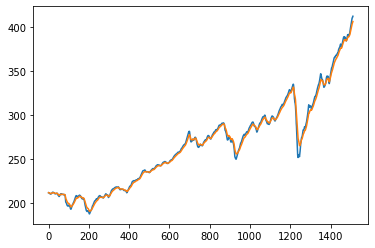

In [36]:
plt.plot(spy_df.index, short_ema)
plt.plot(spy_df.index, long_ema)

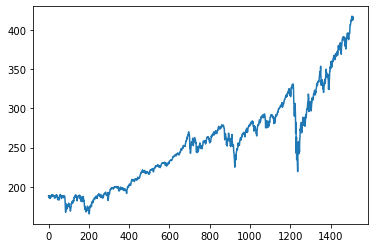

In [38]:
plt.plot(spy_df.Adj_Close)

# EDA

In [32]:
# Evaluating effectiveness of the regressor
# Root mean square error - RMSE
# Mean absolute percentage error - MAPE

In [43]:
spy_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

In [56]:
# Dealing with missing data

In [57]:
for col in spy_df.columns:
    print("nul cols for " + col + ": " + str(len(spy_df.loc[spy_df[col] == ''])))

nul cols for Date: 0
nul cols for Open: 0
nul cols for High: 0
nul cols for Low: 0
nul cols for Close: 0
nul cols for Adj_Close: 0
nul cols for Volume: 0


# Split data into dependent and independent vars

In [101]:
# X - columns of data used to make classifications
# y - the values that we're trying to predict
X = spy_df.drop('Close', axis=1).copy()
y = spy_df['Close'].copy()

In [102]:
len(X) / 253 # Trading days in a year - data for ~6 years

5.972332015810276

In [103]:
X.head()

,Open,High,Low,Adj_Close,Volume
Date,,,,,
2015-04-24,211.660004,211.970001,211.110001,188.502869,61327400
2015-04-27,212.330002,212.479996,210.539993,187.719086,79358100
2015-04-28,210.740005,211.500000,209.330002,188.315811,86863500
2015-04-29,210.369995,211.289993,209.600006,187.540955,125684900
2015-04-30,209.880005,210.350006,207.619995,185.661713,161304900


In [104]:
y.head()

Date
2015-04-24    211.649994
2015-04-27    210.770004
2015-04-28    211.440002
2015-04-29    210.570007
2015-04-30    208.460007
Name: Close, dtype: float64

In [105]:
# Split into test / training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [107]:
# Setup a regressor
xgbr = xgb.XGBRegressor(objective='binary:logistic', missing=None, seed=69)
xgbr.fit(X_train,
         y_train,
         verbose=True,
         early_stopping_rounds=10,
         eval_metric='aucpr',
         eval_set=[(X_test, y_test)])

XGBoostError: [17:57:10] /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:102: label must be in [0,1] for logistic regression
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001610230fe dmlc::LogMessageFatal::~LogMessageFatal() + 110
  [bt] (1) 2   libxgboost.dylib                    0x00000001611242dd xgboost::obj::RegLossObj<xgboost::obj::LogisticClassification>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*) + 1165
  [bt] (2) 3   libxgboost.dylib                    0x00000001610ccd51 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 609
  [bt] (3) 4   libxgboost.dylib                    0x000000016101909c XGBoosterUpdateOneIter + 156
  [bt] (4) 5   libffi.7.dylib                      0x000000010c12dead ffi_call_unix64 + 85
  [bt] (5) 6   ???                                 0x0000000306059ad0 0x0 + 12985932496

